In [1]:
#Name : Srinedhi T S
#Task6 : Prediction with Decision Tree Algorithm

In [2]:
#importing necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
#importing and reading dataset
data = pd.read_csv("Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Counts of all the unique entries
data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
#Dropping Id Column since it is unnecessary in this case
data.drop(data.columns[[0]], axis = 1, inplace = True)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#Finding the correlation among the columns
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


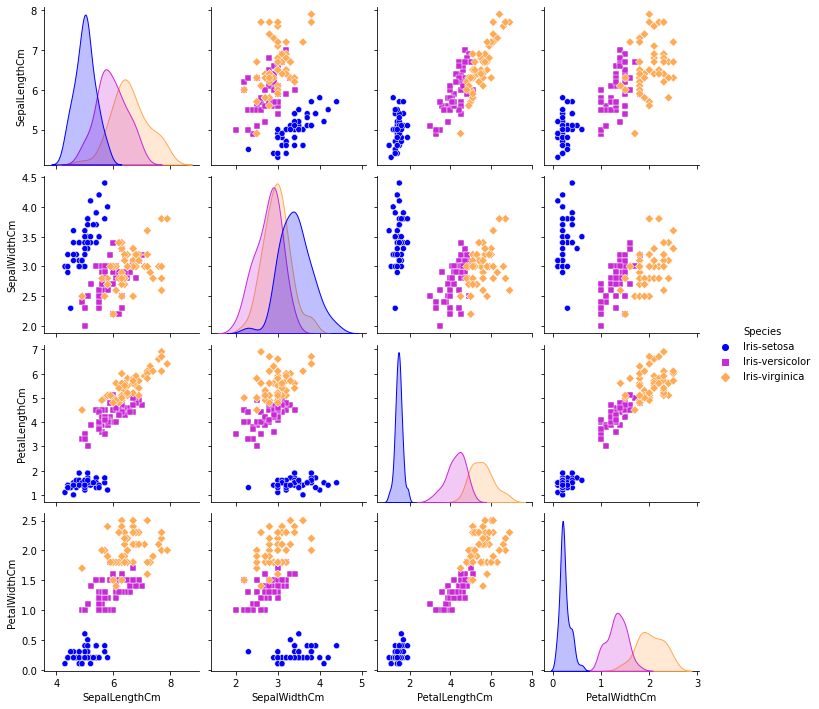

In [9]:
#Visualising the relationship and distribution among the features using pairplot
sns.pairplot(data, hue='Species', markers = ["o", "s", "D"], palette = "gnuplot2")
plt.show()

In [10]:
#Assigning input and target values
X = data.iloc[:,[0,1,2,3]].values
Y = data.iloc[:,[4]].values

In [11]:
#Splitting data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [12]:
#Creating Decision Tree Classifier Model

#model = DecisionTreeClassifier(criterion='gini',min_samples_split=2, max_depth = 3, random_state = 0)
model = DecisionTreeClassifier(criterion='gini',min_samples_split=2, random_state = 0)

In [13]:
#Training the model on training data
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text

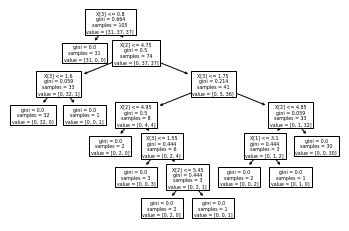

In [14]:
#Visualising the model or tree formed on the training data
tree.plot_tree(model)

In [15]:
#Displaying Feature Importances
col = data.iloc[:,[0,1,2,3]].columns
featureimp = pd.DataFrame({'feature': col,'importance' : np.round(model.feature_importances_, 3)})
featureimp.sort_values('importance', ascending=False, inplace = True)
print("Feature importance :", featureimp)

Feature importance :          feature  importance
3   PetalWidthCm       0.557
2  PetalLengthCm       0.424
1   SepalWidthCm       0.019
0  SepalLengthCm       0.000


In [16]:
#Displaying score
modelscore = model.score(X_test, Y_test)
print(modelscore)

1.0


In [17]:
y_pred = model.predict(X_test)

In [18]:
#Displaying the accuracy and Confusion Matrix
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy is : ", accuracy_score(Y_test, y_pred))

from sklearn.metrics import  confusion_matrix

confmatrix=np.array(confusion_matrix(Y_test,y_pred))

confmatrix


Accuracy is :  1.0


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [19]:
#Visualising the confusion matrix
#confusion_matrix = metrics.confusion_matrix(Y_test,  
                                           # y_pred)
#matrix = pd.DataFrame(confusion_matrix)
#ax = plt.axes()
#sns.set(font_scale=1.3)
#sns.heatmap(matrix, annot=True, fmt="g", ax=ax)
#ax.set_title('Confusion Matrix - Decision Tree')

In [20]:
#Calculating and displaying Precision
precision = metrics.precision_score(Y_test, y_pred, average=None)
labels = data['Species'].unique()
pres = pd.DataFrame(precision, index=labels)

pres.rename(columns={0:'precision'}, inplace =True)

In [21]:
pres

,precision
Iris-setosa,1.0
Iris-versicolor,1.0
Iris-virginica,1.0


In [22]:
#Calculating and displaying the recall
recall = metrics.recall_score(Y_test, y_pred, average =None)
recres = pd.DataFrame(recall, index= labels)
recres.rename(columns ={0:'Recall'}, inplace =True)
recres

,Recall
Iris-setosa,1.0
Iris-versicolor,1.0
Iris-virginica,1.0


In [23]:
#Calculating and displaying the F1 score
f1 = metrics.f1_score(Y_test, y_pred, average=None)
f1res = pd.DataFrame(f1, index=labels)

f1res.rename(columns={0:'f1'}, inplace=True)
f1res

,f1
Iris-setosa,1.0
Iris-versicolor,1.0
Iris-virginica,1.0


In [24]:
#Displaying the Classification Report
from sklearn.metrics import classification_report
print("Classification report : ", classification_report(Y_test, y_pred))

Classification report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



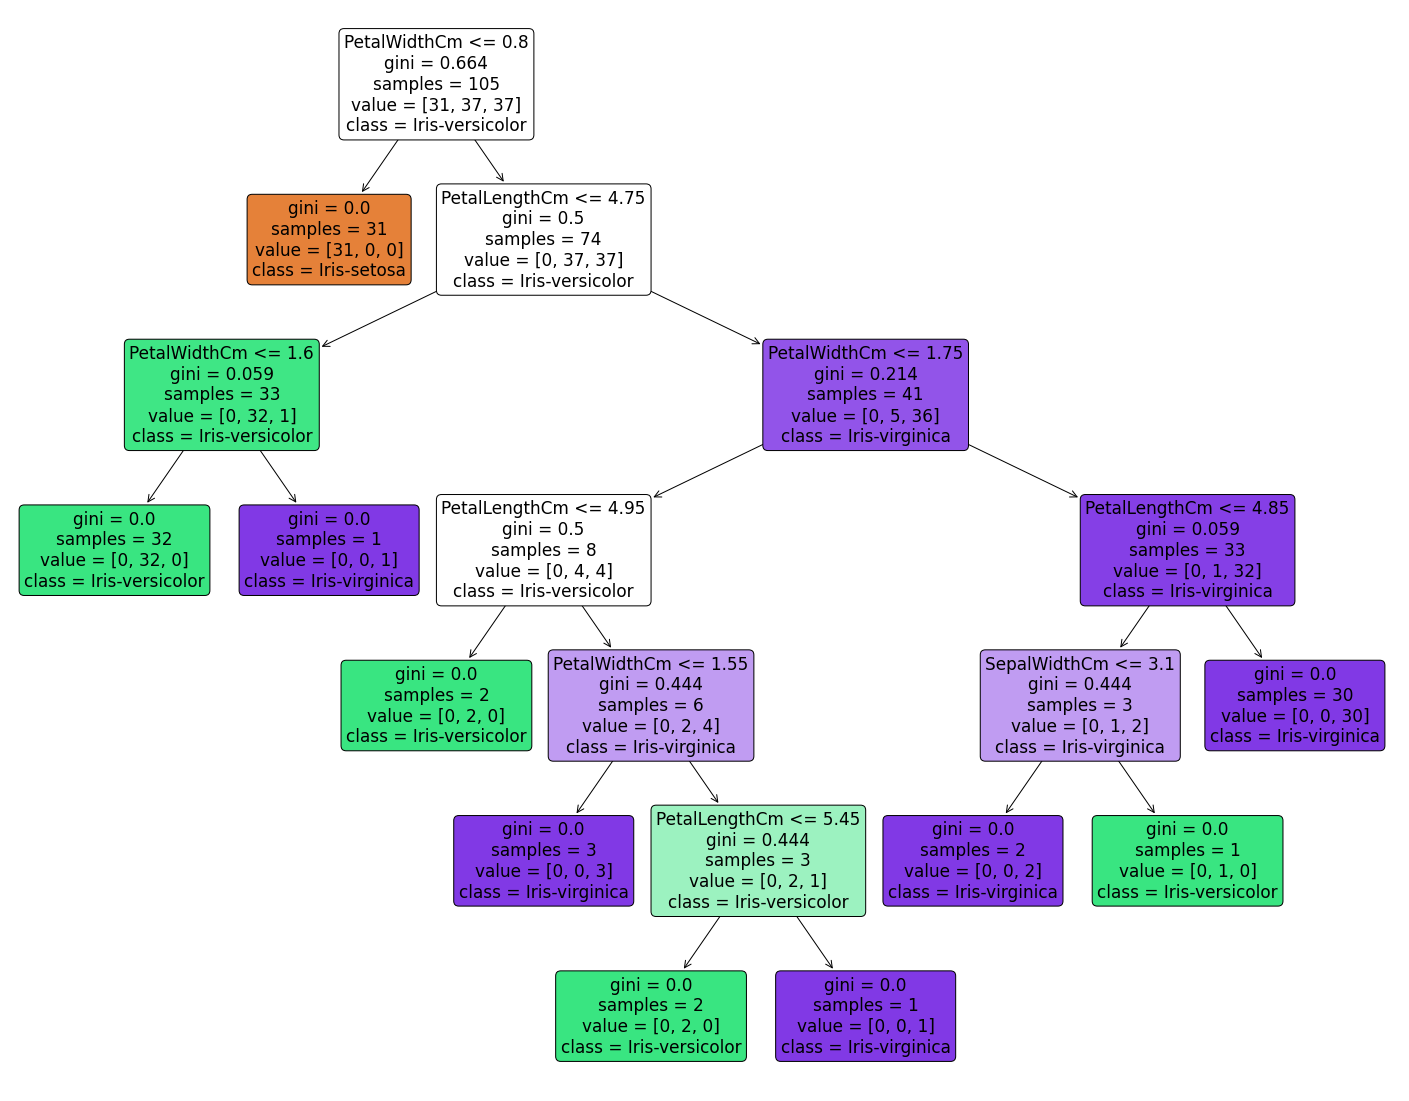

In [25]:
#Visualising the tree
from sklearn.tree import plot_tree
feature_names = data.columns[:4]
target_names = data['Species'].unique().tolist()
plt.rcParams['figure.figsize'] = (25, 20)
plot_tree(model, feature_names = feature_names, class_names = target_names, filled = True, rounded = True)

plt.show()

In [26]:
plt.savefig('viz.png') 

<Figure size 1800x1440 with 0 Axes>